In [1]:
#NOTE: this notebook contain a list of videos to be processed. 
#        videos are selected such that bitrate > 2Mbps and resolution is 720x1280
# .        
#INPUT: annotation_dict, videos folder, log_scaledvid_metainfo.txt, log_alldvid_metainfo.txt
#OUTPUT: list of selected videos (~50 to 100 videos)
#
import imagenet_converter
import log_parser
import namespace
import pickle

reload(imagenet_converter)
reload(namespace)

import numpy as np
from collections import Counter

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
LogParser = log_parser.LogParser()
Converter = imagenet_converter.ImageNetConverter()

In [6]:

#the raw annotation is just a list of [filename: annotation_for_that_file]
if 'raw_anno' not in locals():
    raw_anno = pickle.load(open(namespace.FILEPATH_IMAGENET_ANNOTATION))
anno, anno_dict = Converter.convert_annotation(raw_anno)

In [4]:
tmp = LogParser.parse_video_metainfo(namespace.FILEPATH_LOG_VIDEOMETAINFO)
info_list,info_dict,f_list,b_list,w_list = Parser.parse_video_metainfo(namespace.FILEPATH_LOG_VIDEOMETAINFO)


NameError: name 'Parser' is not defined

In [ ]:
print Counter(w_list)

In [32]:


#FIRST, from all IMAGE NET, extract only video with bitrate > 2Mbps
temp = []
for k, h, w, b in info_list:
    if h==720 and w==1280 and b > 2.:
        temp.append((k, h, w, b))
        
print "total video: {}".format(len(info_list))
print '#video after filtering <2.0Mbps: {}, ({}% filtered out)'.format(len(temp), 1.-len(temp)*1.0/len(info_list))
        
#get top N random videos to upload from tower to devcloud
N=50
np.random.shuffle(temp)
for item in temp[:N]:
    print item[0]        

total video: 3862
#video after filtering <2.0Mbps: 1737, (0.550233039876% filtered out)
ILSVRC2015_VID_train_0003/ILSVRC2015_train_01054000.mp4
ILSVRC2015_VID_train_0003/ILSVRC2015_train_00023002.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00256004.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00650000.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00568001.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00017010.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00092004.mp4
ILSVRC2015_VID_train_0003/ILSVRC2015_train_00145005.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00119030.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00226002.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00529001.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00272022.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00168011.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00218002.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00287000.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00092020.mp4
ILSVRC2015_VID_t

In [14]:
#SECOND, check the status of the scaled video
info2_list,_,_,_,_ = Parser.parse_video_metainfo('./data/VID_data/log_scaledvid_metainfo.txt')


total number of 720x1280 videos: 2188
number of video after bitrate filtering: 232, (0.893967093236percent filtered out)


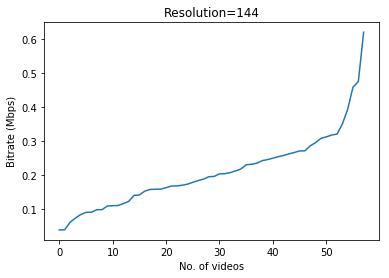

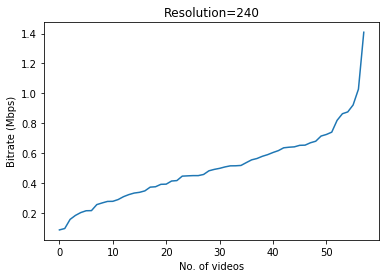

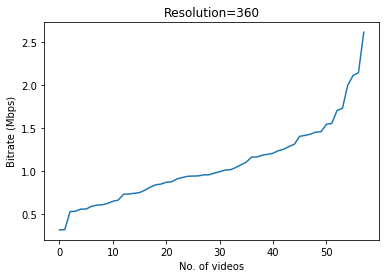

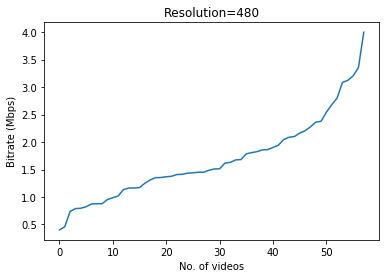

<Figure size 432x288 with 0 Axes>

In [45]:
print 'total number of 720x1280 videos: {}'.format(2188)
r144_list, r240_list, r360_list, r480_list = [], [], [], []
rdict = {144:r144_list, 240:r240_list, 360:r360_list, 480:r480_list}
rlist = []
for filename, w, h, br in info2_list:
    #if w==144 and br < 0.1:
    #    continue
    #if w==240 and br < 0.2:
    #    continue
    #if w==360 and br < 0.5:
    #    continue
    #if w==480 and br < 1.0:
    #    continue
    rdict[w].append(br)
    rlist.append((w, br))
print 'number of video after bitrate filtering: {}, ({}percent filtered out)'.format(len(rlist), 1.-len(rlist)*1.0/2188)
    
for item in [144, 240, 360, 480]:
    plt.plot(sorted(rdict[item]))
    plt.title('Resolution={}'.format(item))
    plt.xlabel('No. of videos')
    plt.ylabel('Bitrate (Mbps)')
    plt.figure()    

In [67]:
text.split('\n')[0]

'ILSVRC2015_VID_train_0001/ILSVRC2015_train_00296000.mp4'

In [76]:
#THIRD, extract a list of selected videos. 
#To do this, identify the videos not ready to be scaled, remove it from the VID_data/raw folders
tmp = []
for item in text.split('\n'):
    dtoken = Converter.get_token_from_filepath(item)
    if anno_dict[dtoken].values()[0] == []:
        tmp.append(item)
for item in sorted(tmp):
    print item

ILSVRC2015_VID_train_0000/ILSVRC2015_train_00024002.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00046004.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00065003.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00097000.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00153001.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00189000.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00201004.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00238009.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00266000.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00285002.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00296000.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00333001.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00142003.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00363000.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00404001.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00442000.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00549001.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00751

In [43]:
text = '''ILSVRC2015_VID_train_0001/ILSVRC2015_train_00296000.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00050005.mp4
ILSVRC2015_VID_train_0003/ILSVRC2015_train_01014000.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00065003.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00596001.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00404001.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00442000.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00549001.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00434001.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00290019.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00142003.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00333001.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00266000.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00097000.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00238009.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00753000.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00117023.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00754000.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00073002.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00285002.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00034000.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00240012.mp4
ILSVRC2015_VID_train_0003/ILSVRC2015_train_01001004.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00139001.mp4
ILSVRC2015_VID_train_0003/ILSVRC2015_train_01026001.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00046004.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00073017.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00290016.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00071013.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00758001.mp4
ILSVRC2015_VID_train_0003/ILSVRC2015_train_00915000.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00372000.mp4
ILSVRC2015_VID_train_0003/ILSVRC2015_train_00237005.mp4
ILSVRC2015_VID_train_0003/ILSVRC2015_train_01065001.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00092021.mp4
ILSVRC2015_VID_train_0003/ILSVRC2015_train_01058000.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00153001.mp4
ILSVRC2015_VID_train_0003/ILSVRC2015_train_00900002.mp4
ILSVRC2015_VID_train_0003/ILSVRC2015_train_00977002.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00189000.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00185002.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00025028.mp4
ILSVRC2015_VID_train_0003/ILSVRC2015_train_00152004.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00052001.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00051004.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00363000.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00117002.mp4
ILSVRC2015_VID_train_0001/ILSVRC2015_train_00201004.mp4
ILSVRC2015_VID_train_0002/ILSVRC2015_train_00751000.mp4
ILSVRC2015_VID_train_0000/ILSVRC2015_train_00024002.mp4'''

In [46]:
#THIS IS IMPORTANT PIECES OF CODE TO CREATE DICT STRUCTURE TO STORE SELECTED VIDEOS

vid_dirtoken_dict = {}
for vidpath in text.split():
    dtoken = Converter.get_dirtoken_from_vidpath(vidpath)
    vidname = vidpath.split('/')[-1].replace('.mp4', '')
    vid_dirtoken_dict[vidname] = dtoken
    
pickle.dump(vid_dirtoken_dict, open(namespace.FILEPATH_VID_DIRTOKEN_DICT, 'w'))

In [47]:
vid_dirtoken_dict

{'ILSVRC2015_train_00024002': 'ILSVRC2015_VID_train_0000_ILSVRC2015_train_00024002',
 'ILSVRC2015_train_00025028': 'ILSVRC2015_VID_train_0000_ILSVRC2015_train_00025028',
 'ILSVRC2015_train_00034000': 'ILSVRC2015_VID_train_0000_ILSVRC2015_train_00034000',
 'ILSVRC2015_train_00046004': 'ILSVRC2015_VID_train_0000_ILSVRC2015_train_00046004',
 'ILSVRC2015_train_00050005': 'ILSVRC2015_VID_train_0000_ILSVRC2015_train_00050005',
 'ILSVRC2015_train_00051004': 'ILSVRC2015_VID_train_0000_ILSVRC2015_train_00051004',
 'ILSVRC2015_train_00052001': 'ILSVRC2015_VID_train_0000_ILSVRC2015_train_00052001',
 'ILSVRC2015_train_00065003': 'ILSVRC2015_VID_train_0000_ILSVRC2015_train_00065003',
 'ILSVRC2015_train_00071013': 'ILSVRC2015_VID_train_0000_ILSVRC2015_train_00071013',
 'ILSVRC2015_train_00073002': 'ILSVRC2015_VID_train_0000_ILSVRC2015_train_00073002',
 'ILSVRC2015_train_00073017': 'ILSVRC2015_VID_train_0000_ILSVRC2015_train_00073017',
 'ILSVRC2015_train_00092021': 'ILSVRC2015_VID_train_0000_ILSVRC20

In [10]:
#FOURTH, read the youtube video list in .csv files, collect all youtube id
#INPUT: yt_bb_detection_train.csv
#OUTPUT: youtube_1080_vidlist.txt
import pandas as pd
import numpy as np
import requests

In [24]:
df = pd.DataFrame.from_csv('./data/YOUTUBE_data/yt_bb_detection_train.csv')
#now extract youtube id_list
col1 = df.iloc[:,0]
id_list = list(set(col1.keys()))
np.random.shuffle(id_list)

/home/u9167/.conda/envs/env_torch/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [13]:
"lBB8MvT6xjU" in id_list

True

In [14]:
df.loc['lBB8MvT6xjU']

,238000,0,person,0.1,present,0.482,0.54,0.37166667,0.6166667
AAB6lO-XiKE,,,,,,,,,
lBB8MvT6xjU,43000,8,giraffe,0,absent,-1.0,-1.0,-1.0,-1.0
lBB8MvT6xjU,44000,8,giraffe,0,absent,-1.0,-1.0,-1.0,-1.0
lBB8MvT6xjU,45000,8,giraffe,0,absent,-1.0,-1.0,-1.0,-1.0
lBB8MvT6xjU,46000,8,giraffe,0,absent,-1.0,-1.0,-1.0,-1.0
lBB8MvT6xjU,47000,8,giraffe,0,absent,-1.0,-1.0,-1.0,-1.0
lBB8MvT6xjU,48000,8,giraffe,0,absent,-1.0,-1.0,-1.0,-1.0
lBB8MvT6xjU,49000,8,giraffe,0,absent,-1.0,-1.0,-1.0,-1.0
lBB8MvT6xjU,50000,8,giraffe,0,absent,-1.0,-1.0,-1.0,-1.0
lBB8MvT6xjU,51000,8,giraffe,0,absent,-1.0,-1.0,-1.0,-1.0


In [225]:
#TODO: list all video that has 1080x1920 resolutions
#FOURTH, read the youtube video list in .csv files, collect all youtube id
import pandas as pd
import numpy as np
import requests

#Annotated data structure
#youtube_id - (string) the YouTube identifier of the video the segment was extracted from. One may view the selected video at http://youtu.be/${youtube_id}.
#timestamp_ms - (integer) the time in milliseconds of the classified frame in the video.
#class_id - (integer) a numeric identifier for the object class.
#class_name - (string) a human-readable name for the object class.
#object_presence - (string) whether or not the object is present in the frame ('present' or 'absent').


#get list of all youtube id
df = pd.DataFrame.from_csv('./data/YOUTUBE_data/yt_bb_detection_train.csv', header=None)
df.head()
#./data/YOUTUBE_data/yt_bb_detection_train_filtered.csv

/home/u9167/.conda/envs/env_torch/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  app.launch_new_instance()


,1,2,3,4,5,6,7,8,9
0,,,,,,,,,
AAB6lO-XiKE,238000,0,person,0,present,0.482,0.540,0.371667,0.616667
AAB6lO-XiKE,239000,0,person,0,present,0.514,0.588,0.363333,0.606667
AAB6lO-XiKE,240000,0,person,0,present,0.534,0.614,0.443333,0.685000
AAB6lO-XiKE,241000,0,person,0,present,0.515,0.605,0.448333,0.686667
AAB6lO-XiKE,242000,0,person,0,present,0.550,0.600,0.400000,0.638333


In [226]:
#crawl the website, search for 1920x1080 videos only (only do this in local tower)
#    then, output the video ID into file

#DO NOT DO THIS ON DEVCLOUD MACHINE!!!!
#user the ./script/get_youtube_1080x_videolist.py


In [227]:
#now given a list of vid, filter out the df
temp_vid_list = '''jWe1PavhzPY
eC2EM98CiUc
jdJcju_3MBk
U8MBq42aG-o
yZuo6jdEt_A
uPha-bODWkQ
G1erzj8dKHc
FIGhnuJWX5M
95Gh1o1M94s
Rpn1EcI_ESo
gXU5Vf7O1Rg
5ZpDLgEcT-g
FaINra3PYko
Z0hbBIb2bko
5JNntP0dkS8
5BG5JKJd0LE
tdL8p6Qd7Ss
2IAmlmIl82A'''.split('\n')


temp_vid_list = open('./data/YOUTUBE_data/youtube_1080_vidlist_0_29200.txt').read().split('\n')[:-1]
temp_vid_list += open('./data/YOUTUBE_data/youtube_1080_vidlist_29200_58700.txt').read().split('\n')[:-1]
temp_vid_list += open('./data/YOUTUBE_data/youtube_1080_vidlist_58700_87200.txt').read().split('\n')[:-1]
temp_vid_list += open('./data/YOUTUBE_data/youtube_1080_vidlist_87200_115800.txt').read().split('\n')[:-1]
temp_vid_list += open('./data/YOUTUBE_data/youtube_1080_vidlist_115800_143300.txt').read().split('\n')[:-1]
temp_vid_list += open('./data/YOUTUBE_data/youtube_1080_vidlist_28300.txt').read().split('\n')[:-1]
temp_vid_list = list(set(temp_vid_list))

In [228]:
df1 = df.loc[temp_vid_list]
df1.iloc[:, 0] = df1.iloc[:, 0].values.astype('int64')
df1.iloc[:, 1] = df1.iloc[:, 1].values.astype('int64')
df1.iloc[:, 3] = df1.iloc[:, 3].values.astype('int64')
print 'total annotated frames in x1080 videos gotten so far: ', len(df1)
print 'total videos: {}'.format(len(set(df1.iloc[:, 0].keys())))

total annotated frames in x1080 videos gotten so far:  151674
total videos: 4770


In [229]:
#so far, only 0_29200, is downloaded, 
#now, ask tower to download again, 3000 videos.
df1.to_csv('./data/YOUTUBE_data/yt_bb_detection_train_filtered.csv')
df1.to_pickle('./data/YOUTUBE_data/yt_bb_detection_train_filtered.pkl.gz', compression='gzip')#'pickle-file.pkl.gz'

In [4]:
#next, get some statistics about filtered videos


/home/u9167/.conda/envs/env_torch/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


881

In [21]:
#Extract class name & class ID to merge with the current framework
#+ count which classes can be used now
#+ 

class_list = set([tuple(item) for item in df.iloc[:, [1, 2]].as_matrix()])


/home/u9167/.conda/envs/env_torch/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [24]:
class_dict = {item[0]: item[1] for item in class_list}
print class_dict

{0: 'person', 1: 'bird', 2: 'bicycle', 3: 'boat', 4: 'bus', 5: 'bear', 6: 'cow', 7: 'cat', 8: 'giraffe', 9: 'potted plant', 10: 'horse', 11: 'motorcycle', 12: 'knife', 13: 'airplane', 14: 'skateboard', 15: 'train', 16: 'truck', 17: 'zebra', 18: 'toilet', 19: 'dog', 20: 'elephant', 21: 'umbrella', 23: 'car'}


In [68]:
#FIFTH: fromlist of youtube id which we sure to be 1080x resolution, download the highest resolution
#NOTE: this task is obsolete since we use available library to do it instead. Saved one week of works. Yay!!!
#INPUT: 
#OUTPUT: *.mp4, all the videos, put into ./data/YOUTUBE_data/vid_1080x folder

import pytube
import sys
#reload(sys)
#sys.setdefaultencoding("utf-8")

In [69]:
#YouTube('https://youtu.be/9bZkp7q19f0').streams.first().download()
vid = '8yGJTjpUHQQ'
url = 'http://youtube.com/watch?v={}'.format(vid)
yt = pytube.YouTube(url)

yt.streams.all()[:3]

[<Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2">,
 <Stream: itag="43" mime_type="video/webm" res="360p" fps="30fps" vcodec="vp8.0" acodec="vorbis">,
 <Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2">]

In [1]:
#SIXTH, give an youtube vid, identify if the vids is correctly segmented
#the selected video id is: ./yt_bb_detection_train/0/1Zm2Zq55FK4+0+0.mp4
#step 1: upload the videos to devcloud
#step 2: split into one second frames, use this: ffmpeg -i input.flv -vf fps=1 img%03d.jpg
#step 3: run ssd, get result, check buy hand

import os
import glob

import namespace
import log_parser
import youtubebb_converter
import imagenet_converter
import ssd


reload(namespace)
reload(youtubebb_converter)

#vid = '1Zm2Zq55FK4'
#vid = 'bDTAiyG_1hs'
LogParser = log_parser.LogParser()
_, vidinfo_dict, _ = LogParser.parse_video_metainfo(namespace.FILEPATH_YOUTUBE_VID_METAINFO)
YConverter = youtubebb_converter.YoutubeBBConverter(vidinfo_dict)
MConverter = imagenet_converter.ImageNetConverter()

In [ ]:
#ONLY run once
#LogParser.runsh_get_videometainfo(namespace.FILEPATH_SCRIPTS_GETINFO, namespace.DIRPATH_YOUTUBE_VIDEOS, namespace.FILEPATH_YOUTUBE_VID_METAINFO)

In [ ]:
YConverter.create_frame_from_vid(namespace.DIRPATH_YOUTUBE_VIDEOS)


creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i000
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i001
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i002
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i003
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i004
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i005
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i006
split videos into frame into directory above
creating directory: /home/u

creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i001_x480_b256k
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i001_x480_b128k
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i001_x480_b64k
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i001_x480_b32k
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i001_x360_b512k
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i001_x360_b256k
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i001_x360_b12

creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i003_x720_b2048k
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i003_x720_b1024k
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i003_x720_b512k
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i003_x720_b256k
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i003_x720_b128k
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i003_x720_b64k
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i003_x720_

creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i004_x144_b64k
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i004_x144_b32k
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i005_x1080_b2048k
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i005_x1080_b1024k
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i005_x1080_b512k
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i005_x1080_b256k
split videos into frame into directory above
creating directory: /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/i005_x1

In [19]:
#SEVENTH, convert annotation from YOUTUBE-BB to IMAGENET
#step 1, understand the youtube-bb annotation scheme
#step 2, write code to convert csv file to 
#
import numpy as np
from matplotlib import pyplot as plt
import cv2

%matplotlib inline

In [20]:
#step1: understand youtube bb annotation
#youtube_id - (string) the YouTube identifier of the video the segment was extracted from. One may view the selected video at http://youtu.be/${youtube_id}.
#timestamp_ms - (integer) the time in milliseconds of the classified frame in the video.
#class_id - (integer) a numeric identifier for the object class.
#class_name - (string) a human-readable name for the object class.
#object_id - (integer) an identifier of the object in the video. (see note below)
#object_presence - (string) whether or not the object is present in the frame ('present' or 'absent').
#xmin - (float) a [0.0, 1.0] number indicating the left-most location of the bounding box in coordinates relative to the frame size.
#xmax - (float) a [0.0, 1.0] number indicating the right-most location of the bounding box in coordinates relative to the frame size.
#ymin - (float) a [0.0, 1.0] number indicating the top-most location of the bounding box in coordinates relative to the frame size.
#ymax - (float) a [0.0, 1.0] number indicating the bottom-most location of the bounding box in coordinates relative to the frame size.

#proposed ftoken:
#dir_filename_frameid

#ok, understook the headers
#next, make sure the coordinated provided match the object.
#   check which extracted frame match the coordinated 
# .  write code to convert coordinated provided into our format
#    the extracted format should be 

In [337]:
#must have ann

In [6]:
#TODO: create customed anno, anno_dict from raw csv
#input is csv annotation file
#output is anno, anno_dict

import pandas as pd
import cv2
import numpy as np
import glob

import namespace
import log_parser
import youtubebb_converter
import imagenet_converter
import metric_map
import predictor
import utils

reload(utils)
reload(log_parser)
reload(namespace)
reload(youtubebb_converter)
reload(predictor)

from matplotlib import pyplot as plt
%matplotlib inline

LogParser = log_parser.LogParser()
#ONLY run once, results will be written into FILEPATH_YOUTUBE_VID_METAINFO
#LogParser.runsh_get_videometainfo(namespace.FILEPATH_SCRIPTS_GETINFO, namespace.DIRPATH_YOUTUBE_VIDEOS, namespace.FILEPATH_YOUTUBE_VID_METAINFO)


_, vidinfo_dict, _ = LogParser.parse_video_metainfo(namespace.FILEPATH_YOUTUBE_VID_METAINFO)
YConverter = youtubebb_converter.YoutubeBBConverter(vidinfo_dict)
MConverter = imagenet_converter.ImageNetConverter()
mAP = metric_map.mAP()
Pred  = predictor.Predictor()



#only run once to create processed Youtube annotation dict, write to FILEPATH_YOUTUBE_YANNODICT
#YConverter.parse_annotation(namespace.FILEPATH_YOUTUBE_RAWANNOCSV, namespace.FILEPATH_YOUTUBE_YANNODICT)
yanno, yanno_dict = YConverter.load_annotation(namespace.FILEPATH_YOUTUBE_YANNODICT)

df = pd.DataFrame.from_csv('./data/YOUTUBE_data/yt_bb_detection_train.csv', header=None)
df1 = pd.read_pickle('./data/YOUTUBE_data/yt_bb_detection_train_filtered.pkl.gz', compression='gzip')
                            #./data/YOUTUBE_data/yt_bb_detection_train_filtered.csv
    
vidpath = './data/YOUTUBE_data/videos/4/DTsLL8kaDps+4+3.mp4'
dirpath = './data/YOUTUBE_data/videos/4/DTsLL8kaDps+4+3/frames_x1080_b256k'

Loading weights into state dict...
Finished!


/home/u9167/.conda/envs/env_torch/lib/python2.7/site-packages/ipykernel_launcher.py:44: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


In [7]:
#only run once to create processed Youtube annotation dict, write to FILEPATH_YOUTUBE_YANNODICT
#YConverter.parse_annotation(namespace.FILEPATH_YOUTUBE_RAWANNOCSV, namespace.FILEPATH_YOUTUBE_YANNODICT)
yanno, yanno_dict = YConverter.load_annotation(namespace.FILEPATH_YOUTUBE_YANNODICT)

In [8]:
df = pd.DataFrame.from_csv('./data/YOUTUBE_data/yt_bb_detection_train.csv', header=None)
df1 = pd.read_pickle('./data/YOUTUBE_data/yt_bb_detection_train_filtered.pkl.gz', compression='gzip')
                            #./data/YOUTUBE_data/yt_bb_detection_train_filtered.csv

/home/u9167/.conda/envs/env_torch/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [16]:
dirpath = './data/YOUTUBE_data/videos/1/7sq8O2KpCf0+1+0'
#dirpath = './data/YOUTUBE_data/videos/2/xSX_y7hNf5w+2+0'
#dirpath = './data/YOUTUBE_data/videos/3/fIRTsksbVuc+3+1'
#dirpath = './data/YOUTUBE_data/videos/4/akQU-s0RCWE+4+1'
#dirpath= './data/YOUTUBE_data/videos/2/kqKzEnmVZgk+2+0'
#dirpath = './data/YOUTUBE_data/videos/3/fIRTsksbVuc+3+0'

vidpath = './data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1.mp4'
dirpath = './data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/frames_x720_b2048k'
vidpath = './data/YOUTUBE_data/videos/3/fIRTsksbVuc+3+0.mp4'
dirpath = './data/YOUTUBE_data/videos/3/fIRTsksbVuc+3+0/frames_x1080_b2048k'
vidpath = './data/YOUTUBE_data/videos/4/DTsLL8kaDps+4+3.mp4'
dirpath = './data/YOUTUBE_data/videos/4/DTsLL8kaDps+4+3/frames_x144_b32k'
vidpath = './data/YOUTUBE_data/videos/0/-0rfkAAzumg+0+0.mp4'
dirpath = './data/YOUTUBE_data/videos/0/-0rfkAAzumg+0+0/frames_x1080_b1024k'
vidpath = './data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0.mp4'
dirpath = './data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x480_b32k/'

In [17]:
#TODO, test mAP score from ssd model
#goal: input is an image, get ftoken, dtoken
#access annotation

    
filepath_list = glob.glob(dirpath + '/' + '*.jpg')
idx = 6
filepath0 = filepath_list[idx-1]
filepath1 = filepath_list[idx]
filepath2 = filepath_list[idx+1]
filepath = filepath1
print filepath

./data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x480_b32k/000007.jpg


In [18]:
#get ftoken, dtoken from image
dtoken, ftoken = utils.get_dirtoken_from_vidpath(vidpath), utils.get_filetoken_from_imgpath(vidpath, filepath)
print dtoken, ftoken
gt_list = yanno_dict[dtoken][ftoken]
print dtoken, ftoken, gt_list[0]

7sq8O2KpCf0+3+0 7sq8O2KpCf0+3+0+7
7sq8O2KpCf0+3+0 7sq8O2KpCf0+3+0+7 (0.0, 3, 1.0, 0.131, 0.26666668, 0.531, 1.0)


(0.0, 3, 1.0, 0.131, 0.26666668, 0.531, 1.0)


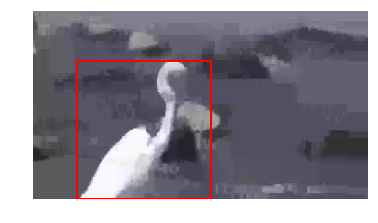

<Figure size 432x288 with 0 Axes>

In [19]:
#imagepath = './data/YOUTUBE_data/videos/1/7sq8O2KpCf0+1+0/000001.jpg'

def plot_bbox(rgb_img, pred_item):
    
    _, cid, score, xmin, ymin, xmax, ymax = pred_item
    cname = namespace.CLASS_INDEX[cid]
    
    scale = np.array(rgb_img.shape[1::-1]+rgb_img.shape[1::-1])#[1::-1])
    label_name = cname
    display_txt = '%s: %.2f'%(label_name, score)
    detection = np.array([xmin, ymin, xmax, ymax])
    pt = detection * scale#(detection*scale).cpu().numpy()
    coords = (pt[0], pt[1]), pt[2]-pt[0]+1, pt[3]-pt[1]+1
    
    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()
    color = colors[0]

    plt.imshow(rgb_img)
    currentAxis = plt.gca()
    currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
    plt.axis('off')
    plt.figure()



img0, img1, img2 = cv2.imread(filepath0, cv2.IMREAD_COLOR), cv2.imread(filepath1, cv2.IMREAD_COLOR), cv2.imread(filepath2, cv2.IMREAD_COLOR)
rgb_img0, rgb_img1, rgb_img2 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB), cv2.cvtColor(img1, cv2.COLOR_BGR2RGB), cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

print gt_list[0]
plot_bbox(rgb_img1, gt_list[0])
#0.038	0.456	0.258333	0.618333  15
#0.053	0.442	0.226667	0.580000  16

(480, 854, 3)
[[0, 6, 0.3837163746356964, 0.074112296, 0.24994943, 0.55396307, 1.0077832]]
----
[(0.0, 3, 1.0, 0.131, 0.26666668, 0.531, 1.0)]


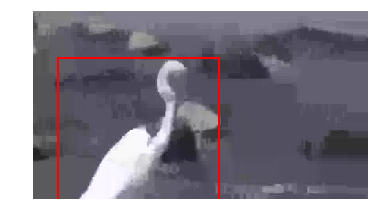

<Figure size 432x288 with 0 Axes>

In [20]:
pred_list = Pred.detect(img1)
print img1.shape
print pred_list
print '----'
print gt_list
plot_bbox(rgb_img1, pred_list[0])

In [14]:
mAP.score(pred_list, gt_list)

1.0

In [408]:
YConverter._vidinfo_dict['fIRTsksbVuc+3+0']

(1080, 1920, 29.97002997002997, 8.526432999999999)

In [366]:
df1.loc['95Gh1o1M94s']

,1,2,3,4,5,6,7,8,9
0,,,,,,,,,
95Gh1o1M94s,13000,0,person,0,absent,-1.000,-1.000,-1.000000,-1.000000
95Gh1o1M94s,14000,0,person,0,absent,-1.000,-1.000,-1.000000,-1.000000
95Gh1o1M94s,15000,0,person,0,absent,-1.000,-1.000,-1.000000,-1.000000
95Gh1o1M94s,16000,0,person,0,absent,-1.000,-1.000,-1.000000,-1.000000
95Gh1o1M94s,17000,0,person,0,absent,-1.000,-1.000,-1.000000,-1.000000
95Gh1o1M94s,18000,0,person,0,absent,-1.000,-1.000,-1.000000,-1.000000
95Gh1o1M94s,19000,0,person,0,absent,-1.000,-1.000,-1.000000,-1.000000
95Gh1o1M94s,20000,0,person,0,absent,-1.000,-1.000,-1.000000,-1.000000
95Gh1o1M94s,21000,0,person,0,absent,-1.000,-1.000,-1.000000,-1.000000


In [367]:
#goal: debug image error in bycicle frames
#step 1: extract full frames into test folder
#step 2: write program to : display image & bbox using image path, and row record inthe df file

In [368]:
def get_row_from_vid_cid_oid(df, vid, cid0, oid, t):
    cid_pos = 1
    t_pos = 0
    oid_pos = 3
    
    df_vid = df.loc[vid]
    df_vid = df_vid[(df_vid.iloc[:, cid_pos]==cid0) & (df_vid.iloc[:, oid_pos]==oid) & (df_vid.iloc[:, t_pos]==t)]
    
    print df_vid
    return df_vid.iloc[0].values

def debug_bbox(df, vid, img_idx, cid0, cid, oid, score, xmin, ymin, xmax, ymax):
    img_template = '/home/u9167/content_aware/data/YOUTUBE_data/videos/2/test_xSX_y7hNf5w+2+0/{0:06d}.jpg'
    print cid0, oid, img_idx
    img_path = img_template.format(img_idx)
    

    print 'IMGPATH: ', img_path
    
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    pred_item = [0.0, cid, score, xmin, ymin, xmax, ymax]
    plot_bbox(rgb_img, pred_item)

In [369]:
vid = 'xSX_y7hNf5w'
#vid = 'fIRTsksbVuc'
cid0 = 2
oid = 0
t = 19 #(15, 48) (10, 240) (6, 94)
print 'fps: ', YConverter._vidinfo_dict['xSX_y7hNf5w+2+0']
image_idx = 144
cid = utils.convert_YOUTUBE_CLASSID_to_CLASSID(cid0)

temp = get_row_from_vid_cid_oid(df1, vid, cid0, oid, t*1000)
print temp

_, _, cname, _, present, xmin, xmax, ymin, ymax = temp
debug_bbox(df1, vid, image_idx, cid0, cid, oid, 1.0, xmin, ymin, xmax, ymax)



fps:  (1080, 1920, 23.97442727757059, 8.647179)
                 1  2        3  4        5      6      7     8    9
0                                                                  
xSX_y7hNf5w  19000  2  bicycle  0  present  0.269  0.572  0.47  1.0
[19000 2 'bicycle' 0 'present' 0.26899999999999996 0.5720000000000001 0.47
 1.0]
2 0 144
IMGPATH:  /home/u9167/content_aware/data/YOUTUBE_data/videos/2/test_xSX_y7hNf5w+2+0/000144.jpg


error: OpenCV(4.1.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [411]:
df1.loc[vid]

,1,2,3,4,5,6,7,8,9
0,,,,,,,,,
xSX_y7hNf5w,13000,2,bicycle,0,present,0.347,0.553,0.580000,0.950000
xSX_y7hNf5w,14000,2,bicycle,0,present,0.344,0.573,0.505000,0.931667
xSX_y7hNf5w,15000,2,bicycle,0,present,0.314,0.569,0.465000,0.925000
xSX_y7hNf5w,16000,2,bicycle,0,present,0.345,0.631,0.381667,0.865000
xSX_y7hNf5w,17000,2,bicycle,0,present,0.325,0.635,0.390000,0.890000
xSX_y7hNf5w,18000,2,bicycle,0,present,0.294,0.607,0.461667,0.980000
xSX_y7hNf5w,19000,2,bicycle,0,present,0.269,0.572,0.470000,1.000000
xSX_y7hNf5w,20000,2,bicycle,0,present,0.229,0.545,0.453333,1.000000
xSX_y7hNf5w,21000,2,bicycle,0,present,0.152,0.485,0.545000,1.000000


In [317]:
print vid
cid_pos = 1
t_pos = 103
oid_pos = 3
df_vid = df.loc[vid]
df_vid[(df_vid.iloc[:, cid_pos]==cid0) & (df_vid.iloc[:, oid_pos]==oid) & (df_vid.iloc[:, t_pos]==t)]


fIRTsksbVuc


IndexError: single positional indexer is out-of-bounds

In [ ]:
#get video meta info, put into dictionary structure bitrate & resolution & framerate
#the splitting script must use the framerate information



In [56]:
#python script: 
#move to DIRPATH_HOME folder
#get info, point $1 to youtube_data, point $2 to youtube_data
#         execute ./scripts/get_info.sh DIRPATH_YOUTUBE_DATA FILEPATH_YOUTUBE_VID_METAINFO 
#parse the vid_metainfo, create the 

import os
import namespace
import log_parser
import youtubebb_converter

reload(namespace)
reload(log_parser)
reload(youtubebb_converter)


LogParser = log_parser.LogParser()
#ONLY run once
#LogParser.runsh_get_videometainfo(namespace.FILEPATH_SCRIPTS_GETINFO, namespace.DIRPATH_YOUTUBE_VIDEOS, namespace.FILEPATH_YOUTUBE_VID_METAINFO)
_, vidinfo_dict, _ = LogParser.parse_video_metainfo(namespace.FILEPATH_YOUTUBE_VID_METAINFO)
YConverter = youtubebb_converter.YoutubeBBConverter(vidinfo_dict)

In [35]:
tmp = '/home/u9167/content_aware/data/YOUTUBE_data/videos/1/7sq8O2KpCf0+1+0.mp4'
tmp2 = '/home/u9167/content_aware/data/YOUTUBE_data/videos/1/7sq8O2KpCf0+1+0'

In [72]:
os.path.split(os.path.dirname(tmp + '/' + '0.1.jpg'))[1]

'7sq8O2KpCf0+1+0.mp4'

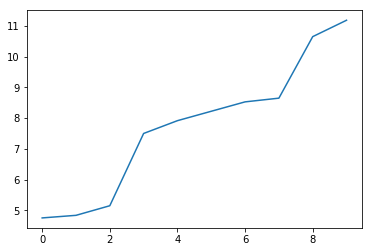

In [563]:
bitrate_list = sorted([item[3] for item in YConverter._vidinfo_dict.values()])
plt.plot(bitrate_list)

total videos:  838


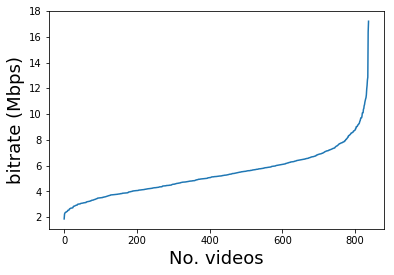

In [571]:
#NOTE: blist is code collected from tower.
#blist is the list of bitrate of all 2k videos
blist = [1.8617899999999998, 2.23555, 2.316524, 2.352766, 2.380763, 2.381215, 2.4101809999999997, 2.4293519999999997, 2.4392799999999997, 2.457025, 2.5288459999999997, 2.5355719999999997, 2.5397179999999997, 2.54431, 2.6054209999999998, 2.644768, 2.649415, 2.683192, 2.693605, 2.697676, 2.6997299999999997, 2.706193, 2.712658, 2.727769, 2.730257, 2.813602, 2.8420039999999998, 2.847721, 2.852778, 2.8690629999999997, 2.879997, 2.908039, 2.911676, 2.921966, 2.935155, 2.9369929999999997, 2.938062, 2.990866, 3.008079, 3.012219, 3.019272, 3.019443, 3.022138, 3.0225239999999998, 3.0280489999999998, 3.055409, 3.0671209999999998, 3.0676989999999997, 3.0751049999999998, 3.0785389999999997, 3.0806199999999997, 3.090594, 3.095628, 3.1074219999999997, 3.11428, 3.114966, 3.124325, 3.125259, 3.127875, 3.128519, 3.132616, 3.1756349999999998, 3.1856489999999997, 3.1921019999999998, 3.1999549999999997, 3.2028239999999997, 3.2108309999999998, 3.21798, 3.228585, 3.231998, 3.2339729999999998, 3.237557, 3.260814, 3.2653809999999996, 3.2677039999999997, 3.299972, 3.3073449999999998, 3.310899, 3.316804, 3.3202019999999997, 3.32589, 3.3422479999999997, 3.355451, 3.3665149999999997, 3.3689869999999997, 3.375984, 3.385986, 3.403387, 3.417116, 3.43397, 3.4379839999999997, 3.4420539999999997, 3.4746729999999997, 3.4780379999999997, 3.487991, 3.490809, 3.494955, 3.496022, 3.4962779999999998, 3.4994319999999997, 3.501444, 3.50705, 3.512809, 3.514014, 3.520189, 3.522048, 3.523136, 3.5498499999999997, 3.550413, 3.552483, 3.562977, 3.566011, 3.575172, 3.577807, 3.59022, 3.594722, 3.6051599999999997, 3.615424, 3.6288519999999997, 3.6332169999999997, 3.642737, 3.658495, 3.6614839999999997, 3.667636, 3.678909, 3.681143, 3.687681, 3.6995329999999997, 3.722533, 3.7240029999999997, 3.725291, 3.730336, 3.733536, 3.733844, 3.735617, 3.740569, 3.7431639999999997, 3.743817, 3.743981, 3.745415, 3.745606, 3.748204, 3.759219, 3.7652379999999996, 3.770676, 3.772265, 3.7756459999999996, 3.7781469999999997, 3.788163, 3.789004, 3.7928469999999996, 3.796678, 3.8041039999999997, 3.807191, 3.808912, 3.824445, 3.824569, 3.826775, 3.827581, 3.8294189999999997, 3.853256, 3.855724, 3.8584509999999996, 3.859032, 3.8634389999999996, 3.8638079999999997, 3.8671719999999996, 3.872541, 3.8756589999999997, 3.876273, 3.881579, 3.8826829999999997, 3.886211, 3.886962, 3.887853, 3.9016849999999996, 3.9050059999999998, 3.94535, 3.954395, 3.956336, 3.960553, 3.961125, 3.9713179999999997, 3.983171, 3.9878839999999998, 3.99368, 4.000331, 4.002679, 4.0244279999999995, 4.025962, 4.027445999999999, 4.038307, 4.0388589999999995, 4.042268, 4.043062, 4.048769, 4.0554, 4.057011999999999, 4.058573, 4.061577, 4.065772, 4.066072, 4.067849, 4.069942, 4.077042, 4.095053, 4.096761, 4.096972, 4.096994, 4.1036019999999995, 4.109497999999999, 4.111241, 4.119929, 4.120877999999999, 4.12278, 4.124035, 4.127306, 4.127467, 4.132466, 4.132518, 4.142533, 4.152479, 4.160142, 4.161061999999999, 4.16677, 4.17281, 4.181952, 4.184775, 4.188377, 4.196491, 4.201181, 4.204412, 4.205577, 4.207193999999999, 4.213061, 4.2180919999999995, 4.224263, 4.227571, 4.227899, 4.231339999999999, 4.234362, 4.241473, 4.246751, 4.249509, 4.263859, 4.2662889999999996, 4.271805, 4.276221, 4.283078, 4.285437, 4.285493, 4.286668, 4.288209999999999, 4.296307, 4.298874, 4.301756, 4.303288, 4.304997999999999, 4.3150569999999995, 4.319203, 4.321473, 4.334064, 4.347341, 4.349136, 4.350573, 4.353009999999999, 4.356202, 4.35776, 4.3581579999999995, 4.360113, 4.404113, 4.4064689999999995, 4.41641, 4.420208, 4.425527, 4.42723, 4.428539, 4.432595, 4.432665, 4.433217, 4.435137999999999, 4.453703, 4.4577, 4.459312, 4.459689, 4.4610199999999995, 4.462355, 4.4677, 4.468277, 4.469857999999999, 4.481483, 4.481746, 4.48353, 4.485576, 4.486625, 4.505521, 4.515213999999999, 4.53491, 4.546107, 4.550917, 4.551456, 4.5578829999999995, 4.558425, 4.563473, 4.563502, 4.5829949999999995, 4.583978999999999, 4.594847, 4.600953, 4.616182, 4.619469, 4.619552, 4.623705999999999, 4.627371, 4.635758, 4.641483, 4.6421, 4.650265, 4.652481, 4.655326, 4.676515, 4.684169, 4.696343, 4.696950999999999, 4.705417, 4.709830999999999, 4.714389, 4.715354, 4.7166049999999995, 4.718926, 4.7242679999999995, 4.726131, 4.727944, 4.7287099999999995, 4.732722, 4.741371, 4.744738, 4.750604, 4.750934, 4.751963, 4.752899, 4.767805, 4.773105, 4.7809029999999995, 4.783588, 4.792193999999999, 4.794854, 4.79786, 4.800653, 4.800985, 4.801676, 4.810299, 4.810792999999999, 4.8222059999999995, 4.823103, 4.825015, 4.830681, 4.831477, 4.834872, 4.835891, 4.850133, 4.870582, 4.879233999999999, 4.880513, 4.897264, 4.898222, 4.90389, 4.910146, 4.918183, 4.936411, 4.937454, 4.939648, 4.945336, 4.945582, 4.953323999999999, 4.962095, 4.962511, 4.963077999999999, 4.968273, 4.9707799999999995, 4.973736, 4.977256, 4.9790589999999995, 4.979234, 4.981921, 4.983334999999999, 4.984897999999999, 4.989637, 4.99175, 5.000121, 5.000425, 5.001435, 5.013735, 5.013806, 5.024888, 5.048134, 5.050082, 5.050993, 5.05955, 5.066822, 5.069268, 5.069659, 5.070965999999999, 5.084861, 5.095136999999999, 5.113371, 5.122909, 5.123996, 5.124592, 5.125496, 5.126256, 5.132097, 5.140058, 5.142202, 5.147562, 5.147799, 5.148339, 5.152665, 5.153087, 5.157766, 5.162857, 5.168305, 5.173067, 5.176886, 5.180527, 5.184985, 5.187113999999999, 5.188994999999999, 5.190284999999999, 5.194939, 5.198187, 5.198726, 5.199534, 5.210325999999999, 5.216246, 5.2176659999999995, 5.231514, 5.233955, 5.2389529999999995, 5.239648, 5.2518139999999995, 5.255004, 5.255287, 5.25941, 5.260693, 5.26221, 5.2675019999999995, 5.274878999999999, 5.27571, 5.287313, 5.28886, 5.291093, 5.303902, 5.315879, 5.324313999999999, 5.328088, 5.3308029999999995, 5.338875, 5.342515, 5.344237, 5.3488869999999995, 5.359853, 5.380739, 5.3816109999999995, 5.384526999999999, 5.386458999999999, 5.388148, 5.391483, 5.398136, 5.4100909999999995, 5.417056, 5.420121, 5.426565999999999, 5.430018, 5.43988, 5.448435, 5.453676, 5.454593, 5.468056, 5.4771279999999996, 5.479248999999999, 5.483975, 5.4899, 5.4914559999999994, 5.492522999999999, 5.495763, 5.502488, 5.51804, 5.5198089999999995, 5.525715, 5.527495, 5.528627, 5.534669, 5.544485, 5.545312, 5.547104, 5.547308999999999, 5.548448, 5.556289, 5.560403, 5.568855, 5.583754, 5.584407, 5.592979, 5.594806, 5.600822, 5.60298, 5.605271999999999, 5.606987999999999, 5.60747, 5.608466, 5.609964, 5.625696, 5.631654999999999, 5.632781, 5.6336379999999995, 5.634529, 5.647221, 5.659034, 5.66254, 5.665328, 5.665518, 5.665776, 5.674627999999999, 5.683209, 5.686545, 5.690944, 5.699548, 5.71008, 5.711694, 5.712121, 5.718052999999999, 5.720320999999999, 5.72113, 5.738668, 5.7467369999999995, 5.747008999999999, 5.749178, 5.749969, 5.755688, 5.759537, 5.761938, 5.763052, 5.777587, 5.783077, 5.783777, 5.786415, 5.789626, 5.795348, 5.810813, 5.812190999999999, 5.816717, 5.833667999999999, 5.834517, 5.841213, 5.842153, 5.843056, 5.848358, 5.8586789999999995, 5.860478, 5.861740999999999, 5.869339999999999, 5.874823999999999, 5.875652, 5.876117, 5.877419, 5.8847, 5.890823999999999, 5.90085, 5.9008769999999995, 5.929596999999999, 5.939483999999999, 5.942499, 5.9425989999999995, 5.948970999999999, 5.954433, 5.957349, 5.962130999999999, 5.963937, 5.964099, 5.966307, 5.980422, 5.988287, 6.0068459999999995, 6.012066, 6.012357, 6.0143439999999995, 6.028144999999999, 6.0373589999999995, 6.042491999999999, 6.048137, 6.049804, 6.052594, 6.059098, 6.062049, 6.073786, 6.075591999999999, 6.088610999999999, 6.090914, 6.096327, 6.101832, 6.104219, 6.111905999999999, 6.1129809999999996, 6.123069, 6.124728999999999, 6.131135, 6.135447, 6.135739999999999, 6.1642269999999995, 6.166937, 6.170647, 6.181089999999999, 6.1876299999999995, 6.193937, 6.211035, 6.212927, 6.217809, 6.239396999999999, 6.247659, 6.2540119999999995, 6.255864, 6.257931, 6.282102, 6.2852239999999995, 6.286905, 6.288241999999999, 6.291589, 6.297979, 6.303007, 6.310359, 6.31166, 6.313852, 6.334385999999999, 6.34004, 6.349536, 6.352002, 6.365212, 6.3676449999999996, 6.389221, 6.394864, 6.4049949999999995, 6.410169, 6.411167, 6.414897, 6.426333, 6.430911, 6.432208, 6.440226, 6.445513, 6.449015999999999, 6.462445, 6.47018, 6.470619999999999, 6.473729, 6.47673, 6.480993, 6.490492, 6.490689, 6.4965209999999995, 6.500528, 6.501595, 6.506384, 6.528817, 6.528944999999999, 6.5387249999999995, 6.552435999999999, 6.553859, 6.555092, 6.5611749999999995, 6.562126999999999, 6.575755999999999, 6.578310999999999, 6.6023879999999995, 6.608916, 6.615777, 6.626614, 6.631168, 6.651927, 6.655097, 6.672718, 6.677283999999999, 6.680645999999999, 6.684424, 6.686567999999999, 6.697397, 6.701715, 6.715364999999999, 6.722658999999999, 6.734528999999999, 6.737766, 6.740663, 6.750464999999999, 6.798039999999999, 6.803357999999999, 6.828199, 6.831372999999999, 6.834205, 6.8621609999999995, 6.867039999999999, 6.86755, 6.882815, 6.897759, 6.903257, 6.904999999999999, 6.908792, 6.9148, 6.930649, 6.945276, 6.956227999999999, 6.95923, 6.962408, 6.989475, 7.003666, 7.016298, 7.022832999999999, 7.0515479999999995, 7.081307, 7.091345, 7.092289, 7.1108389999999995, 7.1342479999999995, 7.142803, 7.1451329999999995, 7.150846, 7.153970999999999, 7.1563859999999995, 7.190897, 7.193931, 7.199986999999999, 7.225740999999999, 7.226959, 7.238296, 7.248822, 7.256501999999999, 7.278379999999999, 7.283818999999999, 7.3049539999999995, 7.318801, 7.320961, 7.342632999999999, 7.349835, 7.351963, 7.357874, 7.369829999999999, 7.423953999999999, 7.451887999999999, 7.475813, 7.498771, 7.520714, 7.527683, 7.537344, 7.564344999999999, 7.6027119999999995, 7.6231349999999996, 7.6376539999999995, 7.6826229999999995, 7.7040869999999995, 7.704889, 7.716799999999999, 7.728402, 7.751717999999999, 7.763773, 7.764701, 7.780669, 7.7842519999999995, 7.820946999999999, 7.823682, 7.839691999999999, 7.841264, 7.864624, 7.915035, 7.919009999999999, 7.925761, 8.004211999999999, 8.039415, 8.041141999999999, 8.087045999999999, 8.122985, 8.150252, 8.215004, 8.221017, 8.326497, 8.332211, 8.345796, 8.368775, 8.409275, 8.429357999999999, 8.465368, 8.526432999999999, 8.531839, 8.536228999999999, 8.566499, 8.575783, 8.588053, 8.647179, 8.694908, 8.696551, 8.716558, 8.743889, 8.759907, 8.854256, 8.858566, 9.009017, 9.01337, 9.033752, 9.040073999999999, 9.122403, 9.167784, 9.179784999999999, 9.239939999999999, 9.254368, 9.324053, 9.449829, 9.480948999999999, 9.616842, 9.709503, 9.715319, 9.720155, 9.846358, 10.089464, 10.090005, 10.103072, 10.376464, 10.430463999999999, 10.64804, 10.736264, 10.930308, 11.058428, 11.181422, 11.271594, 11.484304999999999, 11.94381, 12.220193, 12.662296999999999, 12.861139999999999, 16.375744, 17.209072]

plt.xlabel('No. videos', fontsize=18)
plt.ylabel('bitrate (Mbps)', fontsize=18)
plt.plot(blist)
print 'total videos: ', len(blist)

In [83]:
#TODO: get all video names
import glob
import namespace
import os

import youtubebb_converter
import log_parser
import utils

reload(log_parser)
reload(youtubebb_converter)
reload(utils)

arr_rs=(1080, 1080, 1080, 1080, 1080, 1080, 1080, 720, 720, 720, 720, 720, 720, 720, 480, 480, 480, 480, 480, 480, 360, 360, 360, 360, 360, 240, 240, 240, 240, 144, 144, 144)
arr_br=('2048k', '1024k', '512k', '256k', '128k', '64k', '32k', '2048k', '1024k', '512k', '256k', '128k', '64k', '32k', '1024k', '512k', '256k', '128k', '64k', '32k', '512k', '256k', '128k', '64k', '32k', '256k', '128k', '64k', '32k', '128k', '64k', '32k')
N = len(arr_rs)

LogParser = log_parser.LogParser()
#ONLY run once
#LogParser.runsh_get_videometainfo(namespace.FILEPATH_SCRIPTS_GETINFO, namespace.DIRPATH_YOUTUBE_VIDEOS, namespace.FILEPATH_YOUTUBE_VID_METAINFO)
_, vidinfo_dict, _ = LogParser.parse_video_metainfo(namespace.FILEPATH_YOUTUBE_VID_METAINFO)
YConverter = youtubebb_converter.YoutubeBBConverter(vidinfo_dict)

('2048k', '1024k', '512k', '256k', '128k', '64k', '32k', '2048k', '1024k', '512k', '256k', '128k', '64k', '32k', '1024k', '512k', '256k', '128k', '64k', '32k', '512k', '256k', '128k', '64k', '32k', '256k', '128k', '64k', '32k', '128k', '64k', '32k')


In [78]:
#example of full path 
#'/home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/frames_x720_b1024k'

#iterate over all raw mp4 videos, cut the extention to retrieve dirpath
#
def remove_redundant_frames_from_dir(target_dirpath, fps):
    #TODO: given splitted frames, filter annotated frames, delete the rest
    #INPUT: target dirpath point to dir contain splitted images
    # .       fps is frame per seconds
    #OUTPUT: target dirpath contains only selected images
    
    #test data: 
    #vidname = '95Gh1o1M94s+0+1', 
    #target_dirpath is path to specific bitrate & resolution
    #ex: namespace.namespace.DIRPATH_YOUTUBE_VIDEOS + '/0/95Gh1o1M94s+0+1/frames_x720_b1024k'
    
    for img_idx, imgpath in enumerate(sorted(glob.glob(target_dirpath + '/' + '*.jpg'))): 
        if int(round((img_idx+1) % fps)) == 0 or img_idx == 0:
            #imgdirpath, imgname_old = os.path.dirname(imgpath), os.path.basename(imgpath)
            imgname_new = namespace.FILETEMPLATE_FRAMEID.format(int(round((img_idx+1) / fps))) + '.jpg'
            imgpath_new = target_dirpath + '/' + imgname_new
            print 'mv {} {}'.format(imgpath, imgpath_new)
            os.system('mv {} {}'.format(imgpath, imgpath_new))
    #after all selected image has been moved, now remove redundant images
    #the redundant images has lenghth of 7, while moved files has length of 6
    cmdstr_rmv = 'rm {}'.format(target_dirpath + '/' + '???????.jpg')
    print 'EXECUTE CMD: {}'.format(cmdstr_rmv)
    os.system(cmdstr_rmv)

print glob.glob(namespace.DIRPATH_YOUTUBE_VIDEOS + '/*/*.mp4')    
for vidpath in glob.glob(namespace.DIRPATH_YOUTUBE_VIDEOS + '/*/*.mp4'):
    vid_dirpath, _ = os.path.splitext(vidpath)  #
    vidname = os.path.split(vid_dirpath)[1]     #example: 95Gh1o1M94s+0+1
    for i in range(N):
        rs = arr_rs[i]
        br = arr_br[i]
        target_dirpath = vid_dirpath + '/' + 'frames_x{}_b{}'.format(rs, br)
        fps = YConverter._vidinfo_dict[vidname][2]
        print target_dirpath
        remove_redundant_frames_from_dir(vidname, target_dirpath, fps)

['/home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1.mp4', '/home/u9167/content_aware/data/YOUTUBE_data/videos/1/7sq8O2KpCf0+1+0.mp4', '/home/u9167/content_aware/data/YOUTUBE_data/videos/2/xSX_y7hNf5w+2+0.mp4', '/home/u9167/content_aware/data/YOUTUBE_data/videos/3/fIRTsksbVuc+3+0.mp4', '/home/u9167/content_aware/data/YOUTUBE_data/videos/4/DTsLL8kaDps+4+3.mp4']
/home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/frames_x1080_b2048k
/home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/frames_x1080_b1024k
/home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/frames_x1080_b512k
/home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/frames_x1080_b256k
/home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/frames_x1080_b128k
/home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/frames_x1080_b64k
/home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/frames_x1080_b32k
/ho

In [74]:

vidpath = '/home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1.mp4'
vidname = os.path.split(os.path.splitext(vidpath)[0])[1]
target_dirpath = '/home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/frames_x720_b256k'
fps = YConverter._vidinfo_dict[vidname][2]
print vidname, target_dirpath, fps

remove_redundant_frames_from_dir(target_dirpath, fps)

95Gh1o1M94s+0+1 /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/frames_x720_b256k 29.97002997
mv /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/frames_x720_b256k/0000001.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/frames_x720_b256k/000000.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/frames_x720_b256k/0000030.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/frames_x720_b256k/000001.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/frames_x720_b256k/1000006.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/frames_x720_b256k/000002.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/frames_x720_b256k/1000036.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/frames_x720_b256k/000003.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos/0/95Gh1o1M94s+0+1/frames_x720_b

In [84]:
#TODO: test youtube converter new code to split in a tested folder
vid_wildcard = '/home/u9167/content_aware/data/YOUTUBE_data/videos_bk/*/*.mp4'
YConverter.remove_refundant_frames(vid_wildcard)

PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b2048k
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b2048k/0000001.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b2048k/000000.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b2048k/0000030.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b2048k/000001.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b2048k/1000006.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b2048k/000002.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b2048k/1000036.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b2048k/000003.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk

mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b512k/3000116.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b512k/000011.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b512k/4000016.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b512k/000012.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b512k/4000046.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b512k/000013.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b512k/5000003.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b512k/000014.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b512k/6000005.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o

PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b64k
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b64k/0000001.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b64k/000000.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b64k/0000030.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b64k/000001.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b64k/1000006.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b64k/000002.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b64k/1000036.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x1080_b64k/000003.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1

mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b2048k/3000116.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b2048k/000011.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b2048k/4000016.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b2048k/000012.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b2048k/4000046.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b2048k/000013.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b2048k/5000003.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b2048k/000014.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b2048k/6000005.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o

PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b256k
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b256k/0000001.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b256k/000000.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b256k/0000030.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b256k/000001.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b256k/1000006.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b256k/000002.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b256k/1000036.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b256k/000003.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1

mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b64k/3000116.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b64k/000011.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b64k/4000016.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b64k/000012.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b64k/4000046.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b64k/000013.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b64k/5000003.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b64k/000014.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x720_b64k/6000005.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x

PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x480_b512k
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x480_b512k/0000001.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x480_b512k/000000.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x480_b512k/0000030.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x480_b512k/000001.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x480_b512k/1000006.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x480_b512k/000002.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x480_b512k/1000036.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x480_b512k/000003.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1

mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x480_b128k/4000016.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x480_b128k/000012.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x480_b128k/4000046.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x480_b128k/000013.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x480_b128k/5000003.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x480_b128k/000014.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x480_b128k/6000005.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x480_b128k/000015.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x480_b128k/6000035.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1

PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x360_b512k
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x360_b512k/0000001.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x360_b512k/000000.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x360_b512k/0000030.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x360_b512k/000001.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x360_b512k/1000006.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x360_b512k/000002.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x360_b512k/1000036.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x360_b512k/000003.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1

mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x360_b128k/3000116.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x360_b128k/000011.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x360_b128k/4000016.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x360_b128k/000012.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x360_b128k/4000046.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x360_b128k/000013.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x360_b128k/5000003.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x360_b128k/000014.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x360_b128k/6000005.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1

PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x240_b256k
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x240_b256k/0000001.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x240_b256k/000000.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x240_b256k/0000030.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x240_b256k/000001.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x240_b256k/1000006.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x240_b256k/000002.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x240_b256k/1000036.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x240_b256k/000003.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1

mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x240_b64k/4000016.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x240_b64k/000012.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x240_b64k/4000046.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x240_b64k/000013.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x240_b64k/5000003.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x240_b64k/000014.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x240_b64k/6000005.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x240_b64k/000015.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x240_b64k/6000035.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x

PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x144_b64k
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x144_b64k/0000001.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x144_b64k/000000.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x144_b64k/0000030.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x144_b64k/000001.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x144_b64k/1000006.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x144_b64k/000002.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x144_b64k/1000036.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x144_b64k/000003.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/0/95Gh1o1M94s+0+1/frames_x

mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b2048k/3000036.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b2048k/000012.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b2048k/3000066.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b2048k/000013.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b2048k/4000014.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b2048k/000014.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b2048k/4000044.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b2048k/000015.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b2048k/5000001.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk

PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b256k
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b256k/0000001.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b256k/000000.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b256k/0000030.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b256k/000001.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b256k/0000060.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b256k/000002.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b256k/0000090.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b256k/000003.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2

mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b64k/3000036.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b64k/000012.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b64k/3000066.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b64k/000013.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b64k/4000014.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b64k/000014.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b64k/4000044.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b64k/000015.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x1080_b64k/5000001.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0

PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b1024k
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b1024k/0000001.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b1024k/000000.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b1024k/0000030.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b1024k/000001.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b1024k/0000060.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b1024k/000002.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b1024k/0000090.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b1024k/000003.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2

mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b256k/3000006.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b256k/000011.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b256k/3000036.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b256k/000012.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b256k/3000066.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b256k/000013.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b256k/4000014.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b256k/000014.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b256k/4000044.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0

PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b32k
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b32k/0000001.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b32k/000000.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b32k/0000030.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b32k/000001.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b32k/0000060.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b32k/000002.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b32k/0000090.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x720_b32k/000003.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x

mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x480_b512k/3000036.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x480_b512k/000012.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x480_b512k/3000066.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x480_b512k/000013.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x480_b512k/4000014.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x480_b512k/000014.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x480_b512k/4000044.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x480_b512k/000015.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x480_b512k/5000001.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0

PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x480_b64k
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x480_b64k/0000001.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x480_b64k/000000.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x480_b64k/0000030.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x480_b64k/000001.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x480_b64k/0000060.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x480_b64k/000002.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x480_b64k/0000090.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x480_b64k/000003.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x

mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x360_b512k/3000036.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x360_b512k/000012.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x360_b512k/3000066.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x360_b512k/000013.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x360_b512k/4000014.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x360_b512k/000014.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x360_b512k/4000044.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x360_b512k/000015.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x360_b512k/5000001.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0

PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x360_b64k
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x360_b64k/0000001.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x360_b64k/000000.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x360_b64k/0000030.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x360_b64k/000001.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x360_b64k/0000060.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x360_b64k/000002.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x360_b64k/0000090.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x360_b64k/000003.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x

mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x240_b256k/3000006.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x240_b256k/000011.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x240_b256k/3000036.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x240_b256k/000012.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x240_b256k/3000066.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x240_b256k/000013.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x240_b256k/4000014.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x240_b256k/000014.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x240_b256k/4000044.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0

PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x240_b32k
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x240_b32k/0000001.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x240_b32k/000000.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x240_b32k/0000030.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x240_b32k/000001.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x240_b32k/0000060.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x240_b32k/000002.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x240_b32k/0000090.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x240_b32k/000003.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x

mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x144_b64k/3000036.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x144_b64k/000012.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x144_b64k/3000066.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x144_b64k/000013.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x144_b64k/4000014.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x144_b64k/000014.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x144_b64k/4000044.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x144_b64k/000015.jpg
mv /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x144_b64k/5000001.jpg /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/1/7sq8O2KpCf0+1+0/frames_x

PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/2/xSX_y7hNf5w+2+0/frames_x240_b128k
EXECUTE CMD: rm /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/2/xSX_y7hNf5w+2+0/frames_x240_b128k/???????.jpg
PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/2/xSX_y7hNf5w+2+0/frames_x240_b64k
EXECUTE CMD: rm /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/2/xSX_y7hNf5w+2+0/frames_x240_b64k/???????.jpg
PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/2/xSX_y7hNf5w+2+0/frames_x240_b32k
EXECUTE CMD: rm /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/2/xSX_y7hNf5w+2+0/frames_x240_b32k/???????.jpg
PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/2/xSX_y7hNf5w+2+0/frames_x144_b128k
EXECUTE CMD: rm /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/2/xSX_y7hNf5w+2+0/frames_x144_b128k/???????.jpg
PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/2/xSX_y7hNf5w+2+0/frames_x144_b64k
EXECUTE CMD: rm /home/u

PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/4/DTsLL8kaDps+4+3/frames_x1080_b1024k
EXECUTE CMD: rm /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/4/DTsLL8kaDps+4+3/frames_x1080_b1024k/???????.jpg
PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/4/DTsLL8kaDps+4+3/frames_x1080_b512k
EXECUTE CMD: rm /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/4/DTsLL8kaDps+4+3/frames_x1080_b512k/???????.jpg
PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/4/DTsLL8kaDps+4+3/frames_x1080_b256k
EXECUTE CMD: rm /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/4/DTsLL8kaDps+4+3/frames_x1080_b256k/???????.jpg
PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/4/DTsLL8kaDps+4+3/frames_x1080_b128k
EXECUTE CMD: rm /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/4/DTsLL8kaDps+4+3/frames_x1080_b128k/???????.jpg
PROCESSING: /home/u9167/content_aware/data/YOUTUBE_data/videos_bk/4/DTsLL8kaDps+4+3/frames_x1080_b64k
EXECUTE 

In [21]:
#TODO: create customed anno, anno_dict from raw csv
#input is csv annotation file
#output is anno, anno_dict

import pandas as pd
import cv2
import numpy as np
import glob
import os

import namespace
import log_parser
import youtubebb_converter
import imagenet_converter
import metric_map
import predictor
import utils

reload(utils)
reload(log_parser)
reload(namespace)
reload(youtubebb_converter)
reload(predictor)

from matplotlib import pyplot as plt
%matplotlib inline


In [22]:

LogParser = log_parser.LogParser()
#ONLY run once, results will be written into FILEPATH_YOUTUBE_VID_METAINFO
#LogParser.runsh_get_videometainfo(namespace.FILEPATH_SCRIPTS_GETINFO, namespace.DIRPATH_YOUTUBE_VIDEOS, namespace.FILEPATH_YOUTUBE_VID_METAINFO)


_, vidinfo_dict, _ = LogParser.parse_video_metainfo(namespace.FILEPATH_YOUTUBE_VID_METAINFO)
YConverter = youtubebb_converter.YoutubeBBConverter(vidinfo_dict)
MConverter = imagenet_converter.ImageNetConverter()
mAP = metric_map.mAP()
Pred  = predictor.Predictor()



#only run once to create processed Youtube annotation dict, write to FILEPATH_YOUTUBE_YANNODICT
#YConverter.parse_annotation(namespace.FILEPATH_YOUTUBE_RAWANNOCSV, namespace.FILEPATH_YOUTUBE_YANNODICT)
yanno, yanno_dict = YConverter.load_annotation(namespace.FILEPATH_YOUTUBE_YANNODICT)

df = pd.DataFrame.from_csv('./data/YOUTUBE_data/yt_bb_detection_train.csv', header=None)
df1 = pd.read_pickle('./data/YOUTUBE_data/yt_bb_detection_train_filtered.pkl.gz', compression='gzip')
                            #./data/YOUTUBE_data/yt_bb_detection_train_filtered.csv


Loading weights into state dict...
Finished!


/home/u9167/.conda/envs/env_torch/lib/python2.7/site-packages/ipykernel_launcher.py:19: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


In [23]:
#CODE to produce groundtruth, prediction result, and mAP for all images
import pickle


#result = {}
result = pickle.load(open(namespace.FILEPATH_YOUTUBE_SEGMENT_PREDRESULT))            

vid_wildcard = namespace.DIRPATH_YOUTUBE_VIDEOS + '/' + '*/*.mp4'
arr_rs = namespace.RESOLUTION_LIST
arr_br = namespace.BITRATE_LIST
N      = namespace.NO_RESOLUTION_LEVELS
for vidpath in glob.glob(vid_wildcard):
    dirpath = os.path.splitext(vidpath)[0]
    #vidpath = './data/YOUTUBE_data/videos/4/DTsLL8kaDps+4+3.mp4'
    #dirpath = './data/YOUTUBE_data/videos/4/DTsLL8kaDps+4+3/frames_x1080_b256k'
    
    #filtering out videos, to get initial results
    #if vidpath.find('videos/0/') < 0:
    #    continue
    

    if vidpath not in result:
        result[vidpath] = {}
        
    for idx in range(N):
        rs = arr_rs[idx]
        br = arr_br[idx]
        target_path = dirpath + '/' + 'frames_x{}_b{}'.format(rs, br)
        
        if target_path not in result[vidpath]:
            result[vidpath][target_path] = []
        
        img_wildcard = target_path + '/' + '*.jpg'
        for img_idx, img_path in enumerate(sorted(glob.glob(img_wildcard))):
            img1 = cv2.imread(img_path, cv2.IMREAD_COLOR)
            rgb_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

            pred_list = Pred.detect(img1)
            
            dtoken, ftoken = utils.get_dirtoken_from_vidpath(vidpath), utils.get_filetoken_from_imgpath(vidpath, img_path)
            gt_list = yanno_dict[dtoken][ftoken]
            
            result[vidpath][target_path].append((img_path, gt_list, pred_list, mAP.score(pred_list, gt_list)))

pickle.dump(result, open(namespace.FILEPATH_YOUTUBE_SEGMENT_PREDRESULT, 'w'))            

In [5]:
#NEXT, after you got the result, need to plot the mAP curve for each images
#from mAP curves for all images [videos][target]
#extract the mAP at all levels for that images

arr_rs = namespace.RESOLUTION_LIST
arr_br = namespace.BITRATE_LIST
N      = namespace.NO_RESOLUTION_LEVELS
key_list = []
for idx in range(N):
        rs = arr_rs[idx]
        br = arr_br[idx]
        key_list.append('frames_x{}_b{}'.format(rs, br))

for vid in result.keys():
    print vid
    dirpath = os.path.splitext(vid)[0]

    n_frames = len(result[vid][result[vid].keys()[0]])
    temp = []
    for idx in range(n_frames):
        temp_item = []
        for pattern in key_list:
            target_path = dirpath + '/' + pattern
            temp_item.append(result[vid][target_path][idx][0])
        temp.append(temp_item)

print temp[7]
print vid

NameError: name 'result' is not defined

In [378]:
dirpath

'/home/u9167/content_aware/data/YOUTUBE_data/videos/0/-0rfkAAzumg+0+0'

In [334]:
'1.0, 1.0, 1.0, 0.1, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 1.0, 0.1, 0.1, 1.0, 1.0, 1.0, 0.1, 0.1, 0.1, 0.1, 1.0, 0.1, 1.0, 1.0, 0.1'.replace(',', ' ')

'1.0  1.0  1.0  0.1  0.1  0.1  0.1  1.0  1.0  1.0  1.0  0.1  0.1  0.1  1.0  1.0  1.0  1.0  0.1  0.1  1.0  1.0  1.0  0.1  0.1  0.1  0.1  1.0  0.1  1.0  1.0  0.1'